<a href="https://colab.research.google.com/github/Olanle/Project-002/blob/main/001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
train=pd.read_csv('/content/drive/MyDrive/AI - MACHINE LEARNING/ ML Project/asl_data/sign_mnist_train.csv')
test=pd.read_csv('/content/drive/MyDrive/AI - MACHINE LEARNING/ ML Project/asl_data/sign_mnist_test.csv')

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [8]:
train.shape

(27455, 785)

In [9]:
test.shape

(7172, 785)

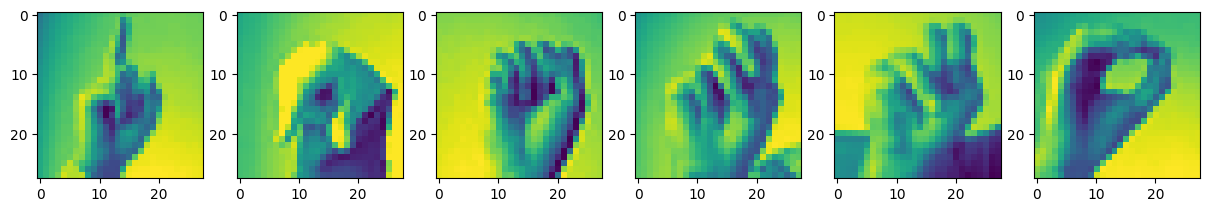

In [10]:
#Data Visualization
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(161)
ax2 = f.add_subplot(162)
ax3 = f.add_subplot(163)
ax4 = f.add_subplot(164)
ax5 = f.add_subplot(165)
ax6 = f.add_subplot(166)
ax.imshow(train.iloc[0].values[1:].reshape(28,28))
ax2.imshow(train.iloc[5].values[1:].reshape(28,28))
ax3.imshow(train.iloc[20].values[1:].reshape(28,28))
ax4.imshow(train.iloc[456].values[1:].reshape(28,28))
ax5.imshow(train.iloc[999].values[1:].reshape(28,28))
ax6.imshow(train.iloc[1500].values[1:].reshape(28,28))
plt.show()

<Axes: ylabel='count'>

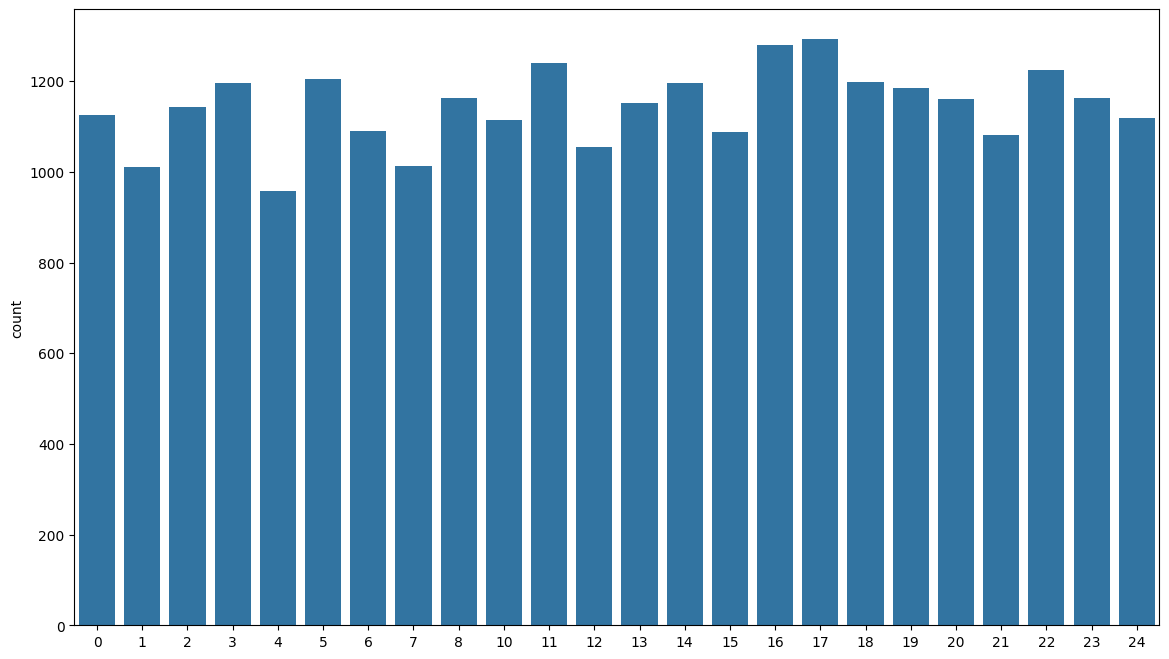

In [11]:
labels = train['label'].values
plt.figure(figsize = (14, 8))
sns.countplot(x =labels)

In [12]:
X_train = train.drop(["label"], axis=1)
X_test = test.drop('label', axis = 1)
Y_train = train['label']
Y_test = test['label']
del train['label']
del test['label']

In [13]:
#Data Normalization, it helps to work CNN faster
X_train = X_train/255.0
X_test = X_test/255.0
X_train.shape
X_test.shape

(7172, 784)

In [14]:
# Reshaping
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape
X_test.shape

(7172, 28, 28, 1)

In [15]:
# Label Encoding

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
Y_train = label_binarizer.fit_transform(Y_train)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)

print("x_train shape", X_train.shape)
print("x_test shape", X_val.shape)
print("y_train shape", Y_train.shape)
print("y_test shape", Y_val.shape)

x_train shape (21964, 28, 28, 1)
x_test shape (5491, 28, 28, 1)
y_train shape (21964, 24)
y_test shape (5491, 24)


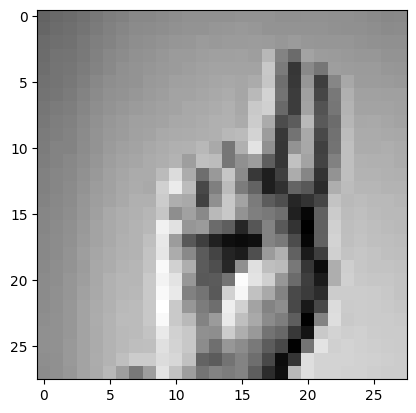

In [17]:
plt.imshow(X_train[10][:, :,0], cmap='gray')
plt.show()

In [18]:
import itertools
import tensorflow as tf

from tensorflow.keras.utils import to_categorical  # convert to one-hot encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,921,944 (14.96 MB)

 Trainable params: 3,921,944 (14.96 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='rmsprop', loss= "categorical_crossentropy", metrics=["accuracy"])

In [25]:
epochs = 10
batch_size = 200

In [26]:
#Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.5, # Randomly zoom image by 5%
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [27]:
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_val, Y_val),
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.0498 - loss: 3.1676 - val_accuracy: 0.1583 - val_loss: 2.7688
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.1370 - loss: 2.8013 - val_accuracy: 0.3205 - val_loss: 2.1246
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.2854 - loss: 2.2826 - val_accuracy: 0.5644 - val_loss: 1.3328
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.4299 - loss: 1.7796 - val_accuracy: 0.6323 - val_loss: 1.0764
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.5478 - loss: 1.3767 - val_accuracy: 0.8561 - val_loss: 0.4489
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.6674 - loss: 1.0029 - val_accuracy: 0.8780 - val_loss: 0.3637
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.7297 - loss: 0.8050 - val_accuracy: 0.9184 - val_loss: 0.2425
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.8018 - loss: 0.6031 - val_accuracy: 0.

In [28]:
#Create a mapping: index → letter

# Mapping index to letter (excluding J and Z)
import string

# Create a list of A-Z
all_letters = list(string.ascii_uppercase)

# Remove J and Z
class_labels = [letter for letter in all_letters if letter not in ['J', 'Z']]

# Now class_labels[0] = 'A', class_labels[1] = 'B', ..., class_labels[23] = 'Y' (excluding J and Z)


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy: 43.56%


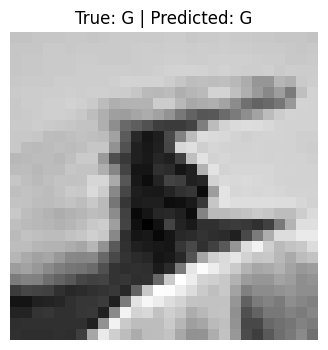

In [37]:
import numpy as np
import string
import matplotlib.pyplot as plt

# --- 1. Define class labels ---

# If your model was trained on full alphabet (A-Z):
class_labels = list(string.ascii_uppercase)  # ['A', 'B', 'C', ..., 'Z'] (26 classes)

# --- 2. Predict on test set ---

# Assuming you have test data as X_test and labels as Y_test (integer encoded)
predictions = model.predict(X_test)                # shape: (num_samples, num_classes)
predicted_classes = np.argmax(predictions, axis=1)  # get predicted class indices

# --- 3. Map indices to letters ---

predicted_letters = [class_labels[i] for i in predicted_classes]
true_letters = [class_labels[i] for i in Y_test]

# --- 4. Evaluate accuracy (optional) ---

accuracy = np.mean(np.array(predicted_classes) == np.array(Y_test))
print(f"Test Accuracy: {accuracy*100:.2f}%")

# --- 5. Visualize sample prediction ---

sample_index = 0  # change to any sample index you want to visualize
sample_image = X_test[sample_index]

plt.figure(figsize=(4,4))
plt.imshow(sample_image.squeeze(), cmap='gray')  # adjust if color image
plt.title(f"True: {true_letters[sample_index]} | Predicted: {predicted_letters[sample_index]}")
plt.axis('off')
plt.show()

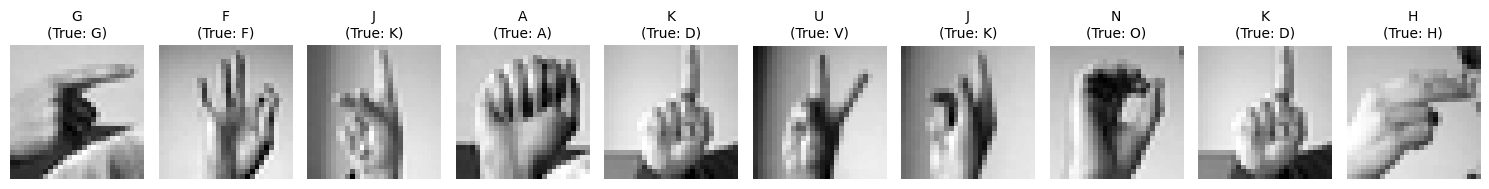

In [38]:
# Show predictions for first 10 images
plt.figure(figsize=(15, 4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"{predicted_letters[i]}\n(True: {true_letters[i]})", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [41]:
# Predict a single image
def predict_letter(image_array):
    image_array = image_array.reshape(1, 28, 28, 1)
    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction)
    return class_labels[predicted_class]

# Example usage
sample_image = X_test[0]
print("Predicted letter:", predict_letter(sample_image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted letter: G


In [42]:
# Ensure X_test and Y_test are already prepared and reshaped
score = model.evaluate(X_test, label_binarizer.transform(Y_test))
print(f"Test accuracy: {score[1] * 100:.2f}%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9694 - loss: 0.1121
Test accuracy: 96.82%


Saving G sign.png to G sign.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


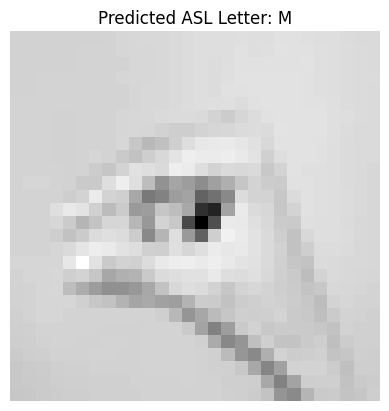

Top 3 predictions:
M: 0.7870
O: 0.1844
H: 0.0253


In [46]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Upload an image file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load and preprocess image: convert to grayscale, resize to 28x28, normalize
img = Image.open(filename).convert('L').resize((28, 28))
img_array = np.array(img) / 255.0
input_image = img_array.reshape(1, 28, 28, 1)  # Add batch and channel dims

# Predict with your model
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions[0])

# Define your label map for ASL letters
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
             10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
             19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X'}

predicted_letter = label_map[predicted_class]

# Display the input image with predicted letter
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(f"Predicted ASL Letter: {predicted_letter}")
plt.show()

# Optional: Print top 3 predictions with probabilities
top_indices = np.argsort(predictions[0])[::-1][:3]
print("Top 3 predictions:")
for i in top_indices:
    print(f"{label_map[i]}: {predictions[0][i]:.4f}")
